In [1]:
# Retirar os warnings - queremos somente os erros nos notebooks, e não eventuais alertas de 'deprecated methods'
# ou 'default value assigned'

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar as ferramentas que serão usadas no notebook:

# Pandas - para leitura e tratamento dos dados
# NumPy - para operações numéricas otimizadas
# Matplotlib + seaborn = gráficos

# O %matplotlib inline é uma mágica do jupyter notebook que permite que os gráficos
# sejam renderizados no próprio HTML do notebook.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# A função learning_curve retorna uma matriz com os resultados do cálculo da curva de aprendizado de um algoritmo.
# Os parâmetros necessários são:
# - Um estimador para ser treinado
# - As entradas (X) de treinamento
# - As saídas (y) de treinamento
# - O número - opcional - de pontos para avaliação do treinamento. São porcentagens do total de dados de treinamento.

from sklearn.model_selection import learning_curve


# A função plot_learning_curve desenha um gráfico com os dados da matriz.
def plot_learning_curve(estimator, X, y):
    
    # O gráfico é inicializado com as características principais
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes)
    
    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [4]:
# Ler o CSV com os dados, tirar uma cópia de segurança - para que possamos trabalhar os dados sem medo :)
# e ver o tamanho do dataset (linhas, colunas)

all_data = pd.read_csv('titanic.csv')
backup = all_data.copy()
all_data.shape

(891, 12)

In [5]:
# Informações gerais sobre os dados lidos.
# Temos a descrição das quantidades de entradas e tipos de dados de cada coluna

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# Descrição das colunas numéricas, com as medidas básicas de estatística:
# - médias
# - desvios padrão
# - valores mínimos e máximos
# - distribuição dos quartis

all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# O método sample permite dar uma 'espiada' em algumas linhas do dataset

all_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S


In [8]:
# Como vimos na descrição, o ID do passageiro, o nome e o número do ticket não nos ajudarão em nada.
# Não existe (ou não deveria existir) relação entre esses dados e o destino do passageiro

all_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
all_data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
141,1,3,female,22.0,0,0,7.750,NaN,S
637,0,2,male,31.0,1,1,26.250,NaN,S
605,0,3,male,36.0,1,0,15.550,NaN,S
298,1,1,male,NaN,0,0,30.500,C106,S
79,1,3,female,30.0,0,0,12.475,NaN,S


In [9]:
# As colunas 'SibSp' e 'Parch' ('Siblings and Spouse' e 'Parents and Children', respectivamente) transmitem
# a mesma informação: o número de familiares a bordo. Podemos então somar os valores em uma única coluna.

all_data['Family'] = all_data['SibSp'] + all_data['Parch']
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
all_data.sample(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
557,0,1,male,NaN,227.525,NaN,C,0
316,1,2,female,24.0,26.000,NaN,S,1
607,1,1,male,27.0,30.500,NaN,S,0
62,0,1,male,45.0,83.475,C83,S,1
212,0,3,male,22.0,7.250,NaN,S,0


In [10]:
# Precisamos tratar os dados ausentes no dataset. Primeiro, vamos verificar quantas entradas estão faltando.

all_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Family        0
dtype: int64

In [11]:
# Como a maioria das entradas não tem um valor para cabine e nós não sabemos por que,
# (os passageiros não tinham cabines? os dados não estavam disponíveis?)
# vamos remover essa coluna.

all_data.drop('Cabin', axis=1, inplace=True)

In [12]:
# Somente dois passageiros não possuem o local de embarque preenchido. Vamos eliminá-los do dataset. 
# O método fillna no Pandas preenche os valores ausentes com um padrão recebido como parâmetro.
# O atributo loc no Pandas recebe um índice (Não é um método com parâmetros!) indicando linhas e colunas que queremos
# manter

all_data['Embarked'].fillna("NNN", inplace=True)
all_data = all_data.loc[all_data['Embarked'] != "NNN", :]

In [13]:
# Já a idade é algo mais elaborado de se tratar.
# Todos os nomes no dataset são acompanhados de um título. Vamos criar uma nova coluna, 'title', com os títulos
# dos passageiros. A ideia é verificar se a média de idade varia com o título, e usar essa média para preencher
# os valores ausentes.

all_data['Title'] = ''

for i in all_data:
    all_data['Title'] = backup['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
all_data.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
436,0,3,female,21.0,34.3750,S,4,Miss
844,0,3,male,17.0,8.6625,S,0,Mr
357,0,2,female,38.0,13.0000,S,0,Miss
577,1,1,female,39.0,55.9000,S,1,Mrs
393,1,1,female,23.0,113.2750,C,1,Miss


In [14]:
# Os títulos encontrados são:

all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

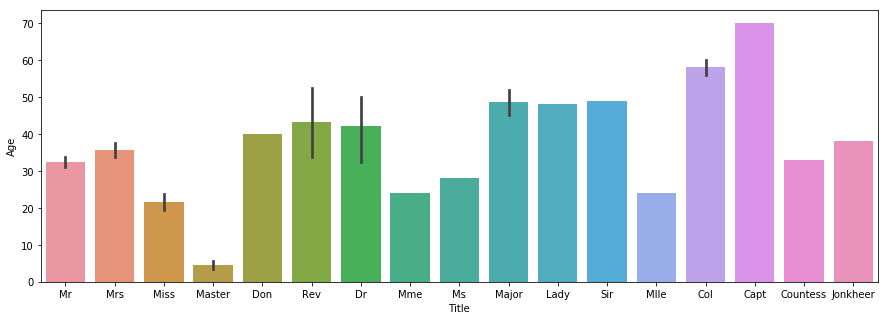

In [15]:
# Olhando um gráfico de idade x título, podemos ver que as médias são diferentes e possuem pequenas
# variações, no geral. Portanto é um bom método para preencher os dados ausentes.

plt.figure(figsize=(15, 5))
sns.barplot(x=all_data['Title'], y=all_data['Age'])

In [16]:
# Criamos um dicionário usando os títulos como chave e as médias de idade como valor

age_means = all_data.groupby('Title')['Age'].mean().to_dict()
age_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.662068965517243,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.654205607476634,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [17]:
# Encontramos, usando loc, as linhas que não tem idade definida e preenchemos essas linhas
# com os valores médios.

no_age = all_data.loc[np.isnan(all_data['Age'])].index
all_data.loc[no_age, 'Age'] = all_data['Title'].loc[no_age].map(age_means)

In [18]:
# Agora os dados estão completos.

all_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Title       0
dtype: int64

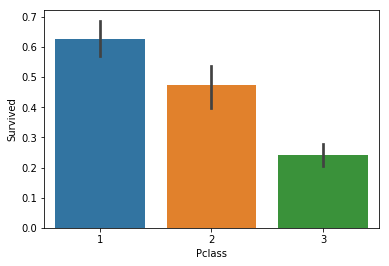

In [19]:
# Nosso palpite é que a classe do passageiro influencia na sua sobrevivência,
# e que viveu mais quem foi de primeira classe. O gráfico mostra exatamente isso.

sns.barplot(x=all_data['Pclass'], y=all_data['Survived'])

In [20]:
# Podemos agora descartar a coluna de títulos ou não. Para tomar essa decisão, vamos agrupar em 'Outros'
# os títulos que não têm muita gente, e verificar a média de sobrevivência.

titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

all_data['Title'] = all_data['Title'].map(titles_dict)

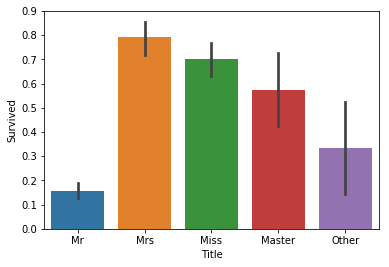

In [21]:
# Como mostra o gráfico, o título pode influenciar no destino do passageiro, e será mantido como
# uma coluna relevante

sns.barplot(x=all_data['Title'], y=all_data['Survived'])

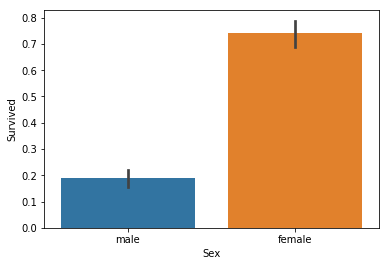

In [22]:
# Como a taxa de sobrevivência de títulos femininos foi maior, manteremos o sexo como determinante para o problema também.

sns.barplot(x=all_data['Sex'], y=all_data['Survived'])

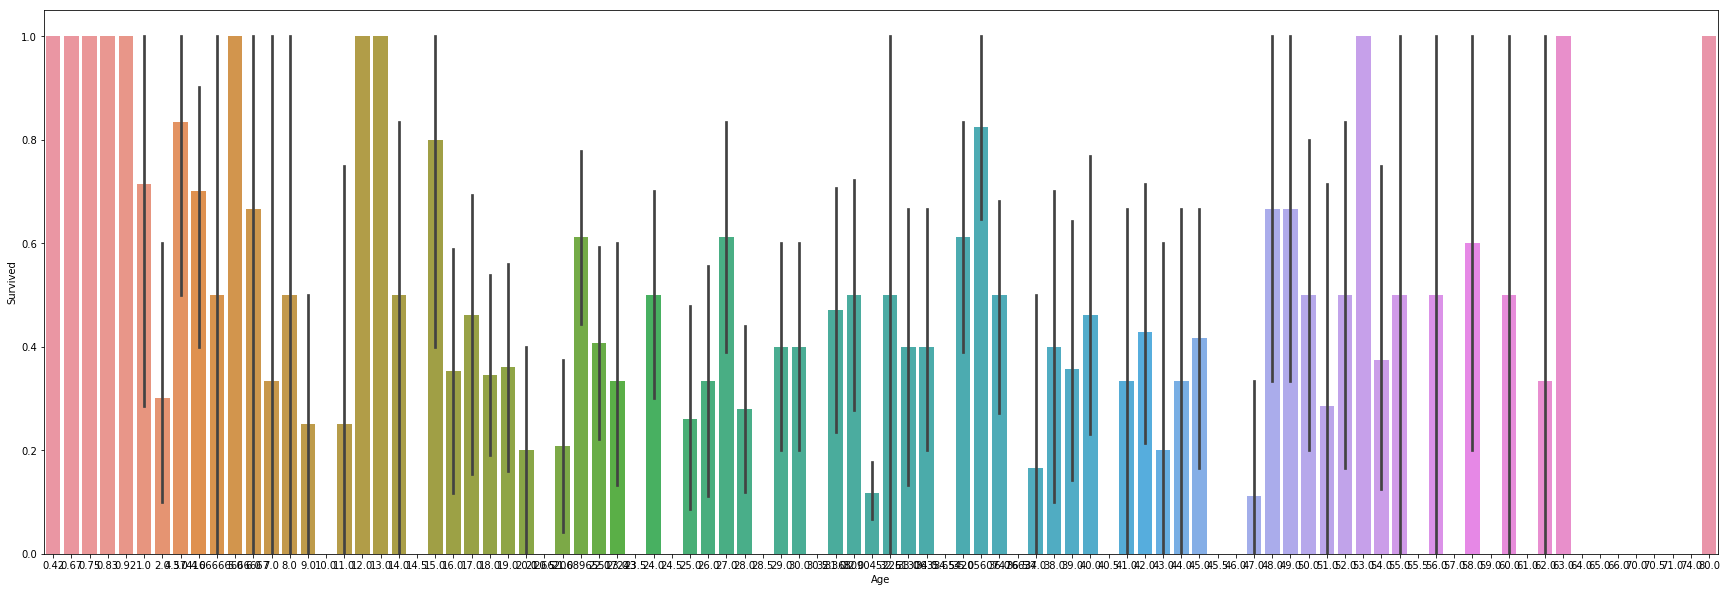

In [23]:
# Para avaliar a influência da idade, podemos verificar através do gráfico a existência de três grupos:
# Crianças e idosos, que tendem a sobreviver mais, e adultos, que tendem a sobreviver menos. Isso faz sentido
# levando em consideração a realidade do comportamento das pessoas em desastres.

plt.figure(figsize=(30, 10))
sns.barplot(x=all_data['Age'], y=all_data['Survived'])

In [24]:
# Portanto, podemos transformar a idade em categorias ('Criança, adulto ou idoso') de acodro com faixas de idade.
# Assim não perdemos a generalização e reduzimos possíveis erros no preenchimento dos valores ausentes.

all_data['Age'] = pd.cut(all_data['Age'], bins=[0, 14, 50, 200], labels=['C', 'A', 'I'])
all_data.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
748,0,1,male,A,53.1000,S,1,Mr
334,1,1,female,A,133.6500,S,1,Mrs
171,0,3,male,C,29.1250,Q,5,Master
628,0,3,male,A,7.8958,S,0,Mr
721,0,3,male,A,7.0542,S,1,Mr


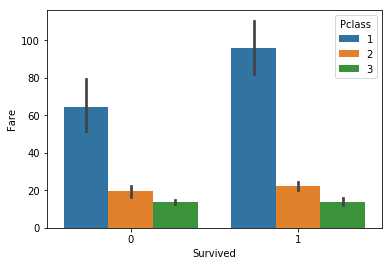

In [25]:
# Relacionando as taxas e as classes, comparando sobreviventes e não sobreviventes, temos um fato curioso:
# Para as classes mais baixas, pagar uma taxa maior ou menor não fez diferença para as pessoas sobreviverem.
# Entretanto, na classe 1, a diferença é observável.
# Isso indica que há colunas que só são relevantes se forem relacionadas com outras colunas.

sns.barplot(all_data['Survived'], all_data['Fare'], all_data['Pclass'])

In [26]:
# Embora a classe apareça como uma variável numérica, ela é categórica.
# Podemos usar o Pandas para transformá-la em uma categoria.

all_data['Pclass'] = pd.Categorical(all_data['Pclass'])

In [27]:
# Como a taxa é uma variável numérica com uma distribuição enviesada pelos valores zero, usamos a transformação
# de Box Cox para procurar aproximá-la de uma distribuição normal. Esse procedimento entrega dados normalizados
# aos modelos lineares, que tendem a responder melhor com a entrada assim.


from scipy.stats import boxcox
all_data['Fare'] = boxcox(all_data['Fare'] + 1)[0]

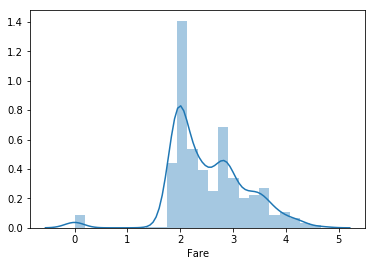

In [28]:
# O gráfico mostra a nova distribuição da coluna 'Fare'.

sns.distplot(all_data['Fare'])

In [29]:
# Agora que as features foram selecionadas, podemos começar a trabalhar no modelo.
# O primeiro passo é separar X (os vetores de entrada) de y (os valores de saída)

X = all_data.loc[: , all_data.columns != 'Survived']
y = all_data['Survived']

In [30]:
# Para as variáveis categóricas serem aplicáveis aos modelos matemáticos, vamos criar 'dummy variables'.
# Uma categoria com 'n' possíveis valores se torna um conjunto de 'n-1' variáveis binárias, indicando
# o pertencimento do item àquela categoria ou não.

X = pd.get_dummies(X)
X.shape

(889, 18)

In [31]:
# O MinMaxScaler transformará os valores da entrada, fazendo com que todos variem dentro do mesmo intervalo.
# O intervalo não foi especificado, então será aplicado o valor padrão - de 0 a 1. A conversão é proporcional.

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [32]:
# Vamos gerar polinômios de grau 2 a partir dos dados de entrada, para passar ao modelo combinações desses dados.
# Essas combinações podem eventualmente evidenciar relações entre as features que tenham impacto na saída.
# Para cada par de features (x, y), teremos como saída (x, y, x^2, x*y, y^2)

from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2)
polynomial.fit(X)
X = polynomial.transform(X)

In [33]:
# Note que isso transformou nossas 18 features em 190!

X.shape

(889, 190)

In [34]:
# Vamos importar os classificadores que serão usados.
# Para esse exercício, vamos comparar dois modelos. Um deles é o perceptron simples (reta de separação), 
# o outro é uma regressão logística (sigmóide com a probabilidade de uma classe).
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

In [35]:
# Usamos agora uma regressão logística para selecionar qual o maior conjunto de features necessário para
# o modelo. Como esse é um problema de classificação, selecionaremos as features que tem o melhor score chi-quadrado.
# (que é um índice de correspondência de variância na expectativa e na distribuição dos dados). Um score maior significa
# maior chance de novos dados seguirem a mesma distribuição, levando a um E_out menor.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

lr_test = LogisticRegression()
best_score = 0
ideal_n = 0

# Entre 1 e 190 features, ordenadas da 'melhor' para a 'pior' (segundo o chi-quadrado), 
# qual o número de features que dá o melhor resultado de validação? Com qual score?
for i in range(1, 191):
    k_best = SelectKBest(score_func=chi2, k=i)
    k_best.fit(X, y)
    
    test_X = k_best.transform(X)
    lr_test.fit(test_X, y)
    score = lr_test.score(test_X, y)
    print(f'Score: {score} para {i} features')
    
    if score > best_score:
        best_score = score
        ideal_n = i
        
print(f'Melhor resultado: {best_score} para {ideal_n} features')

Score: 0.7862767154105736 para 1 features
Score: 0.7862767154105736 para 2 features
Score: 0.7862767154105736 para 3 features
Score: 0.7862767154105736 para 4 features
Score: 0.7862767154105736 para 5 features
Score: 0.7862767154105736 para 6 features
Score: 0.7862767154105736 para 7 features
Score: 0.7862767154105736 para 8 features
Score: 0.7862767154105736 para 9 features
Score: 0.7862767154105736 para 10 features
Score: 0.7862767154105736 para 11 features
Score: 0.7862767154105736 para 12 features
Score: 0.7896512935883014 para 13 features
Score: 0.7896512935883014 para 14 features
Score: 0.7896512935883014 para 15 features
Score: 0.7986501687289089 para 16 features
Score: 0.7997750281214848 para 17 features
Score: 0.7997750281214848 para 18 features
Score: 0.7997750281214848 para 19 features
Score: 0.8200224971878515 para 20 features
Score: 0.8200224971878515 para 21 features
Score: 0.8200224971878515 para 22 features
Score: 0.8200224971878515 para 23 features
Score: 0.82002249718

In [36]:
# Podemos ver que muitas features (provavelmente das criadas com os polinômios) são irrelevantes para o modelo!

# Selecionaremos somente as melhores features em X

k_best = SelectKBest(score_func=chi2, k=ideal_n)
k_best.fit(X, y)
X = k_best.transform(X)

In [37]:
# Criamos as instâncias para cada classificador

perceptron = Perceptron()
logistic_regression = LogisticRegression()

In [38]:
# O método fit() é usado para treinar os modelos com os valores de treinamento

perceptron.fit(X, y)
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Os scores nos mostram como os modelos se saíram na validação dos dados.
# A partir dos scores de treinamento, podemos calcular o E_in e criar expectativas sobre E_out.

print(f'O score do Perceptron é {perceptron.score(X, y)}')
print(f'O score do LogReg é {logistic_regression.score(X, y)}')

O score do Perceptron é 0.8065241844769404
O score do LogReg é 0.843644544431946


<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

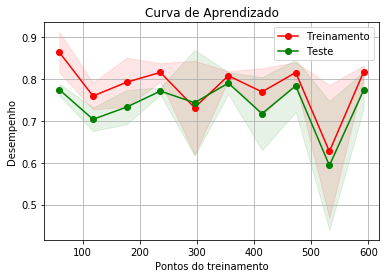

In [40]:
# A curva de aprendizado do perceptron mostra que o modelo é bom, mas instável - acrescentar dados
# só fará com que a reta seja diferente, variando o erro de treinamento e validação.

plot_learning_curve(perceptron, X, y)

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

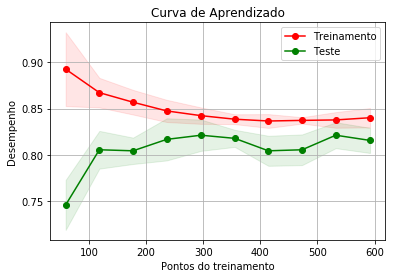

In [41]:
# Já a curva da regressão logística mostra estabilidade em E_in, e permite ver
# uma expectativa clara de score para o modelo quando treinado com maior quantidade de dados.

plot_learning_curve(logistic_regression, X, y)